## 6. 勾配ブースティング
**ブースティング**は、ランダムフォレストと違い各決定木の間に直列的な関係を持たせる。  
また、ブースティングには**勾配法**と**非勾配法**があり、  
非勾配法ではAdaBoost、勾配法には勾配ブースティング決定木やXGBoostと呼ばれる手法がある。

#### アダプティブブースティング(Ada Boost)
簡単なモデル(**弱学習機**)を多数組み合わせることで、より強力なモデルを構築する。  
1つ前のモデルの誤差に応じて、重みの更新をしていく。  
以下の手順で行われる。
1. 最初に、すべての観測値に等しい重みを与える
2. データのサブセットに基づいてモデルを構築する
3. このモデルを使用して、データセット全体に対して予測を行う
4. 誤差は、予測値と実際の値を比較することによって計算する
5. 次のモデルを作成する際、誤って予測されたデータポイントにより高い重みを与える
6. 重みは、誤差を使用して決定する。エラーが高いほど、観測値に割り当てられる重みが大きくなる
7. 誤差関数が変化しなくなるか、推定量の最大数に達するまで繰り返す

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

# base_estimator: DecisionTreeClassifier
adaboost = AdaBoostClassifier(random_state=0,
                              n_estimators=5,
                              learning_rate=1)

adaboost.fit(X, y)

AdaBoostClassifier(learning_rate=1, n_estimators=5, random_state=0)

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cuan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8,
                    label=cl, 
                    cmap=cmap,
                    edgecolor='black')

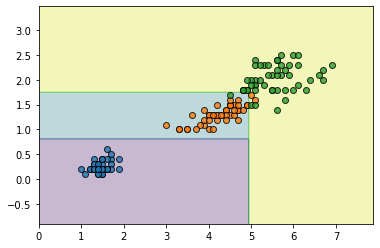

In [11]:
plot_decision_regions(X, y, adaboost)

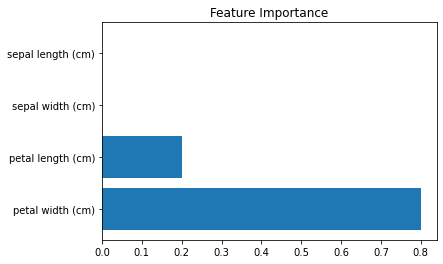

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

adaboost = AdaBoostClassifier(random_state=0,
                              n_estimators=5,
                              learning_rate=1)
adaboost.fit(X, y)
importance = adaboost.feature_importances_
indices = np.argsort(importance)[::-1]

names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices], align='center')
plt.yticks(range(X.shape[1]), names)
plt.show()

In [28]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X[['LSTAT']].values
y = boston.target

In [30]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(random_state=0,
                            n_estimators=5,
                            learning_rate=1)
ada_reg.fit(X, y)

AdaBoostRegressor(learning_rate=1, n_estimators=5, random_state=0)

In [31]:
def lin_reg_plot(X, y, model, c):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color=c ,lw=2)
    return

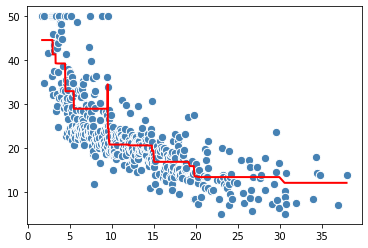

In [32]:
sort_idx = X.flatten().argsort()

lin_reg_plot(X[sort_idx], y[sort_idx], ada_reg, 'red')

#### 勾配ブースティング決定木(GBDT)
1つ前の決定木の誤りを次の決定木が修正するようにして、決定木を直列的に作っていく。  
GBDTでは、各データに対する予測値の誤差に勾配を決めることで、誤差学習機を更新していく。  
また、深さが1～5のような浅い決定木が用いられる。  
決定木の誤りをどれほど強く修正するかを制御する**学習率**というパラメータが導入されており、勾配降下法と似ている。  


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier(random_state=0,
                                           n_estimators=5,
                                           learning_rate=1)

gradientboost.fit(X[:,[2,3]], y)

GradientBoostingClassifier(learning_rate=1, n_estimators=5, random_state=0)

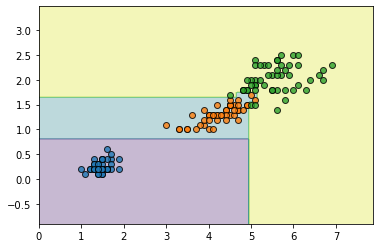

In [25]:
plot_decision_regions(X[:,[2,3]], y, gradientboost)

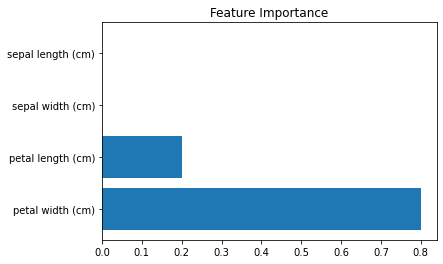

In [26]:
gradientboost = GradientBoostingClassifier(random_state=0,
                                           n_estimators=5,
                                           learning_rate=1)
gradientboost.fit(X, y)
importance = adaboost.feature_importances_
indices = np.argsort(importance)[::-1]

names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices], align='center')
plt.yticks(range(X.shape[1]), names)
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0,
                                    n_estimators=3,
                                    learning_rate=1)
gb_reg.fit(X, y)

GradientBoostingRegressor(learning_rate=1, n_estimators=3, random_state=0)

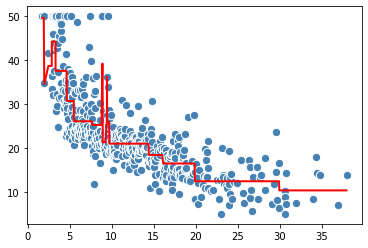

In [46]:
sort_idx = X.flatten().argsort()

lin_reg_plot(X[sort_idx], y[sort_idx], gb_reg, 'red')

#### XGBoost

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
features = cancer.data
target = cancer.target

Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(features, target, stratify=target)
Xcl_train, Xcl_val, ycl_train, ycl_val = train_test_split(Xcl_train, ycl_train, stratify=ycl_train)

#### Learning API

In [71]:
import xgboost as xgb
from sklearn.metrics import log_loss

dtrain = xgb.DMatrix(Xcl_train, label=ycl_train, feature_names=cancer.feature_names)
dvalid = xgb.DMatrix(Xcl_val, label=ycl_val, feature_names=cancer.feature_names)
dtest = xgb.DMatrix(Xcl_test, label=ycl_test, feature_names=cancer.feature_names)

params = {'booster': 'gbtree',
          'objective': 'binary:logistic', # 回帰:reg:squarederror、多クラス分類:multi:softprob
#          'eta': 0.1,
#          'gamma': 0.0,
#          'alpha': 0.0,
#          'lambda': 1.0,
#          'min_child_weight': 1,
#          'max_depth': 5,
#          'subsample': 0.0,
#          'colsample_bytree': 0.8,
          'silent': 1,
          'random_state': 71}
num_round = 50

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist)

va_pred = model.predict(dvalid)
score = log_loss(ycl_val, va_pred)
print(score)

pred = model.predict(dtest)
print(np.sum((pred>=0.5)==(ycl_test))/len(ycl_test))

[11:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.46117	eval-logloss:0.47959
[1]	train-logloss:0.33293	eval-logloss:0.36488
[2]	train-logloss:0.24625	eval-logloss:0.28496
[3]	train-logloss:0.18610	eval-logloss:0.23227
[4]	train-logloss:0.14402	eval-logloss:0.19687
[5]	train-logloss:0.11289	eval-logloss:0.16936
[6]	train-logloss:0.0907

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

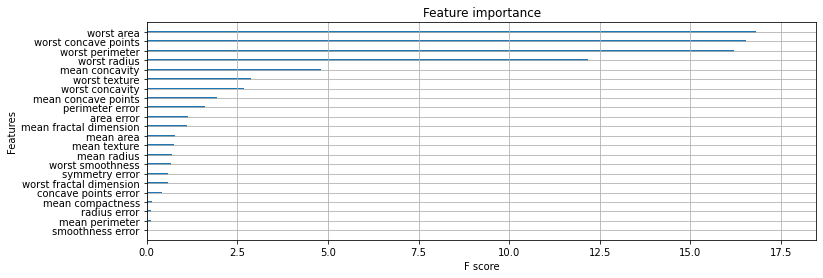

In [72]:
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)

In [115]:
boston = load_boston()

features = boston.data
target = boston.target

Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(features, target)
Xreg_train, Xreg_val, yreg_train, yreg_val = train_test_split(Xreg_train, yreg_train)

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

dtrain = xgb.DMatrix(Xreg_train, label=yreg_train, feature_names=boston.feature_names)
dvalid = xgb.DMatrix(Xreg_val, label=yreg_val, feature_names=boston.feature_names)
dtest = xgb.DMatrix(Xreg_test, label=yreg_test, feature_names=boston.feature_names)

params = {'booster': 'gbtree',
          'objective': 'reg:linear',
          'eval_metric': 'rmse',
#          'eta': 0.1,
#          'gamma': 0.0,
#          'alpha': 0.0,
#          'lambda': 1.0,
#          'min_child_weight': 1,
#          'max_depth': 5,
#          'subsample': 0.0,
#          'colsample_bytree': 0.8,
          'silent': 1,
          'random_state': 71}
num_round = 50

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist)

va_pred = model.predict(dvalid)
print(np.sqrt(mean_squared_error(va_pred, yreg_val)))

pred = model.predict(dtest)
print(r2_score(pred, yreg_test))

[11:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:17.63454	eval-rmse:16.07208
[1]	train-rmse:12.76766	eval-rmse:11.55507
[2]	train-rmse:9.34267	eval-rmse:8.55732
[3]	train-rmse:6.90835	eval-rmse:6.42127
[4]	train-rmse:5.18197	eval-rmse:5.10225
[5]	train-rmse:3.94541	eval-rmse:4.22129
[6]	train-rmse:3.01561	eval-rmse:3.60372
[7]	train-rmse:2.39031	eval-rmse:3.37605
[8]	train-rmse:1.92199	eval-rmse:3.29767
[9]	train-rmse:1.58973	eval-rmse:3.19629
[10]	train-rmse:1.36972	e

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

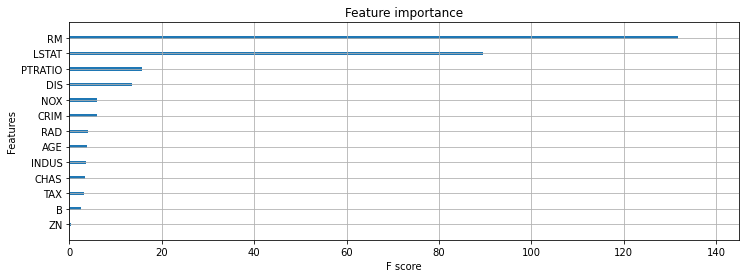

In [75]:
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)

#### scikit-learn API

In [166]:
params = {'n_estimators' :20,
          'random_state': 1,
          'use_label_encoder': False}

fit_params = {'early_stopping_rounds': 5,
              'eval_metric': 'logloss',
              'eval_set': [(Xcl_val, ycl_val)],
              'verbose': True}


model = xgb.XGBClassifier(**params)
model.fit(Xcl_train, ycl_train, **fit_params)

va_pred = model.predict(Xcl_val)
score = log_loss(ycl_val, va_pred)
print(score)

pred = model.predict(Xcl_test)
print(np.sum((pred>=0.5)==(ycl_test))/len(ycl_test))

[0]	validation_0-logloss:0.47959
[1]	validation_0-logloss:0.36488
[2]	validation_0-logloss:0.28496
[3]	validation_0-logloss:0.23227
[4]	validation_0-logloss:0.19687
[5]	validation_0-logloss:0.16936
[6]	validation_0-logloss:0.15051
[7]	validation_0-logloss:0.13778
[8]	validation_0-logloss:0.12899
[9]	validation_0-logloss:0.12167
[10]	validation_0-logloss:0.11742
[11]	validation_0-logloss:0.11263
[12]	validation_0-logloss:0.10908
[13]	validation_0-logloss:0.10641
[14]	validation_0-logloss:0.10539
[15]	validation_0-logloss:0.10468
[16]	validation_0-logloss:0.10235
[17]	validation_0-logloss:0.10260
[18]	validation_0-logloss:0.10249
[19]	validation_0-logloss:0.10304
0.6455995512587089
0.9440559440559441


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

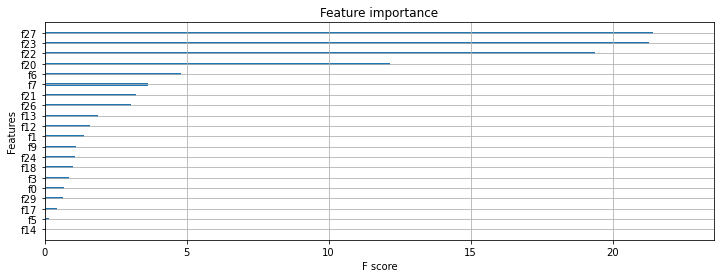

In [152]:
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)

In [169]:
fit_params = {'early_stopping_rounds': 5,
              'eval_metric': 'rmse',
              'eval_set': [(Xreg_val, yreg_val)],
              'verbose': True}

model = xgb.XGBRegressor(**params)
model.fit(Xreg_train, yreg_train, **fit_params)

va_pred = model.predict(Xreg_val)
print(np.sqrt(mean_squared_error(va_pred, yreg_val)))

pred = model.predict(Xreg_test)
print(r2_score(pred, yreg_test))

[0]	validation_0-rmse:16.77147
[1]	validation_0-rmse:12.28038
[2]	validation_0-rmse:9.18650
[3]	validation_0-rmse:7.03753
[4]	validation_0-rmse:5.52921
[5]	validation_0-rmse:4.59823
[6]	validation_0-rmse:3.98017
[7]	validation_0-rmse:3.58939
[8]	validation_0-rmse:3.35839
[9]	validation_0-rmse:3.22497
[10]	validation_0-rmse:3.16686
[11]	validation_0-rmse:3.11259
[12]	validation_0-rmse:3.08808
[13]	validation_0-rmse:3.08406
[14]	validation_0-rmse:3.06630
[15]	validation_0-rmse:3.04610
[16]	validation_0-rmse:3.03563
[17]	validation_0-rmse:3.03079
[18]	validation_0-rmse:3.04531
[19]	validation_0-rmse:3.03759
3.030794987438709
0.8348944879454341


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

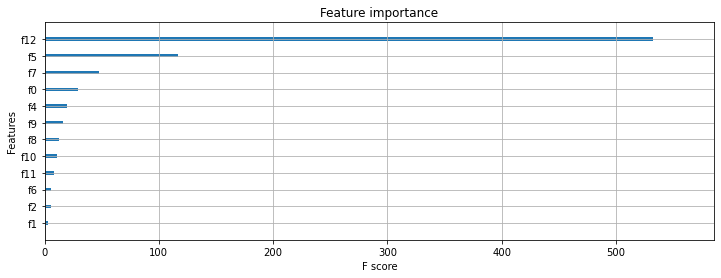

In [170]:
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)

#### lightbgm
- 決定木の分岐をヒストグラムベースにすることによる高速化
- 深さ単位ではなく葉単位での分岐の追加による精度の向上
- カテゴリ変数の分割の最適化による精度の向上

#### Learning API

In [92]:
import lightgbm as lgb
from sklearn.metrics import log_loss

lgb_train = lgb.Dataset(Xcl_train, label=ycl_train, feature_name=cancer.feature_names.tolist())
lgb_valid = lgb.Dataset(Xcl_val, label=ycl_val, feature_name=cancer.feature_names.tolist())

params = {'objective': 'binary',
          'seed': 71,
          #'verbosity': 0,
          #'num_leaves':150,
          #'max_depth':7,
          #'learning_rate':.05,
          #'max_bin':200,
          'metrics': 'binary_logloss'
         }
num_roung = 100

model = lgb.train(params, lgb_train, num_boost_round=num_round,
                 valid_names=['train', 'valid'], valid_sets=[lgb_train, lgb_valid])

va_pred = model.predict(Xcl_val)
score = log_loss(ycl_val, va_pred)
print(score)

pred = model.predict(Xcl_test)
print(np.sum((pred>=0.5)==(ycl_test))/len(ycl_test))

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 200, number of negative: 119
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 319, number of used features: 30
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626959 -> initscore=0.519194
[LightGBM] [Info] Start training from score 0.519194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's binary_logloss: 0.582995	valid's binary_logloss: 0.581099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's binary_logloss: 0.520123	valid's binary_logloss: 0.517296
[LightGBM] [Warning] No further splits with positive gain, be

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

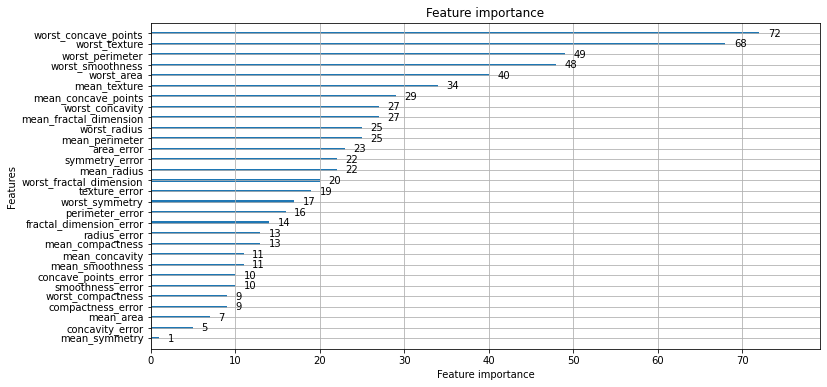

In [93]:
lgb.plot_importance(model, figsize=(12, 6))

In [124]:
lgb_train = lgb.Dataset(Xreg_train, label=yreg_train, feature_name=boston.feature_names.tolist())
lgb_valid = lgb.Dataset(Xreg_val, label=yreg_val, feature_name=boston.feature_names.tolist())

params = {'objective': 'regression',
          'seed': 71,
          #'verbosity': 0,
          #'num_leaves':150,
          #'max_depth':7,
          #'learning_rate':.05,
          #'max_bin':200,
          'metrics': 'mse'
         }
num_roung = 100

model = lgb.train(params, lgb_train, num_boost_round=num_round,
                 valid_names=['train', 'valid'], valid_sets=[lgb_train, lgb_valid])

va_pred = model.predict(Xreg_val)
print(np.sqrt(mean_squared_error(va_pred, yreg_val)))

pred = model.predict(Xreg_test)
print(r2_score(pred, yreg_test))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 13
[LightGBM] [Info] Start training from score 22.889789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's l2: 80.0389	valid's l2: 61.7853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's l2: 68.5411	valid's l2: 52.3961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's l2: 59.1924	valid's l2: 44.528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	train's l2: 51.6305	valid's l2: 37.9983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	train's l2: 45.26	valid's l2: 32.8763
[

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

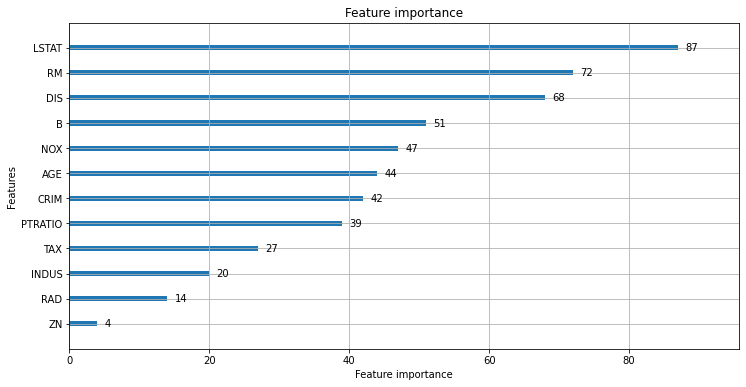

In [125]:
lgb.plot_importance(model, figsize=(12, 6))

#### schikit learn API

In [172]:
params = {'n_estimators' :20,
          'random_state': 1}

fit_params = {'early_stopping_rounds': 5,
              'eval_metric': 'logloss',
              'eval_set': [(Xcl_val, ycl_val)],
              'verbose': True}

model = lgb.LGBMClassifier(**params)
model.fit(Xcl_train, ycl_train, **fit_params)

va_pred = model.predict(Xcl_val)
score = log_loss(ycl_val, va_pred)
print(score)

pred = model.predict(Xcl_test)
print(np.sum((pred>=0.5)==(ycl_test))/len(ycl_test))

[1]	valid_0's binary_logloss: 0.581099
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.517296
[3]	valid_0's binary_logloss: 0.464747
[4]	valid_0's binary_logloss: 0.425913
[5]	valid_0's binary_logloss: 0.387066
[6]	valid_0's binary_logloss: 0.358544
[7]	valid_0's binary_logloss: 0.329912
[8]	valid_0's binary_logloss: 0.307814
[9]	valid_0's binary_logloss: 0.283222
[10]	valid_0's binary_logloss: 0.268139
[11]	valid_0's binary_logloss: 0.250709
[12]	valid_0's binary_logloss: 0.235996
[13]	valid_0's binary_logloss: 0.222206
[14]	valid_0's binary_logloss: 0.210304
[15]	valid_0's binary_logloss: 0.204197
[16]	valid_0's binary_logloss: 0.192498
[17]	valid_0's binary_logloss: 0.185301
[18]	valid_0's binary_logloss: 0.178498
[19]	valid_0's binary_logloss: 0.173724
[20]	valid_0's binary_logloss: 0.165638
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.165638
2.25958348365912
0.9370629370629371


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

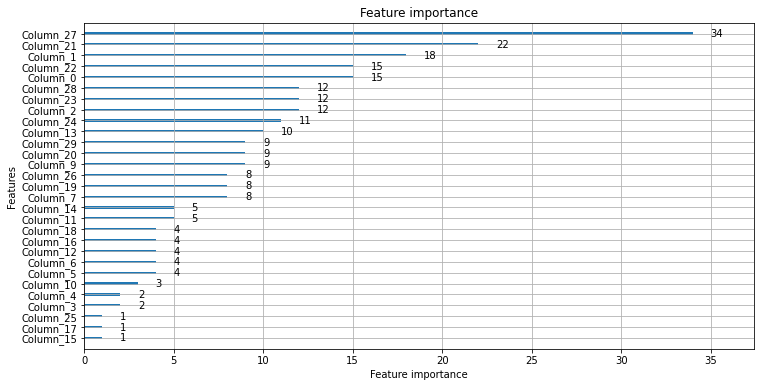

In [156]:
lgb.plot_importance(model, figsize=(12, 6))

In [176]:
fit_params = {'early_stopping_rounds': 5,
              'eval_metric': 'rmse',
              'eval_set': [(Xreg_val, yreg_val)],
              'verbose': True}

model = lgb.LGBMRegressor(**params)
model.fit(Xreg_train, yreg_train, **fit_params)

va_pred = model.predict(Xreg_val)
print(np.sqrt(mean_squared_error(va_pred, yreg_val)))

pred = model.predict(Xreg_test)
print(r2_score(pred, yreg_test))

[1]	valid_0's rmse: 7.86036	valid_0's l2: 61.7853
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 7.23851	valid_0's l2: 52.3961
[3]	valid_0's rmse: 6.67293	valid_0's l2: 44.528
[4]	valid_0's rmse: 6.16428	valid_0's l2: 37.9983
[5]	valid_0's rmse: 5.73379	valid_0's l2: 32.8763
[6]	valid_0's rmse: 5.355	valid_0's l2: 28.6761
[7]	valid_0's rmse: 4.99307	valid_0's l2: 24.9308
[8]	valid_0's rmse: 4.68869	valid_0's l2: 21.9838
[9]	valid_0's rmse: 4.39479	valid_0's l2: 19.3142
[10]	valid_0's rmse: 4.20156	valid_0's l2: 17.6531
[11]	valid_0's rmse: 3.98199	valid_0's l2: 15.8562
[12]	valid_0's rmse: 3.80407	valid_0's l2: 14.471
[13]	valid_0's rmse: 3.64184	valid_0's l2: 13.263
[14]	valid_0's rmse: 3.52809	valid_0's l2: 12.4474
[15]	valid_0's rmse: 3.39955	valid_0's l2: 11.5569
[16]	valid_0's rmse: 3.28514	valid_0's l2: 10.7921
[17]	valid_0's rmse: 3.21933	valid_0's l2: 10.3641
[18]	valid_0's rmse: 3.12684	valid_0's l2: 9.7771
[19]	valid_0's rmse: 3.06272	valid_0'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

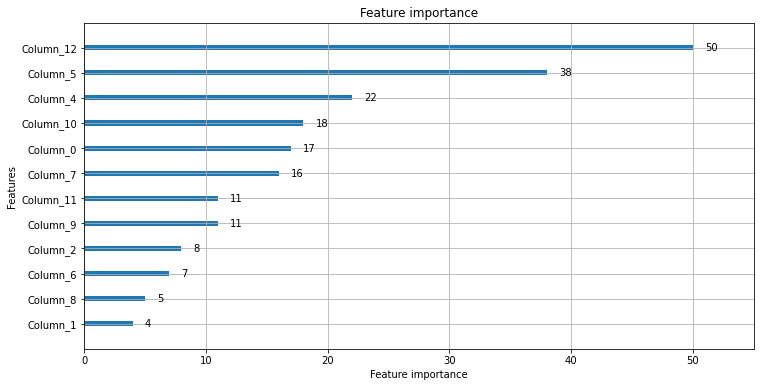

In [177]:
lgb.plot_importance(model, figsize=(12, 6))

In [159]:
?model.fit